In [1]:
#import packages and download corresponding packages like punkt stopwords and wordnet
import glob
import time
import pandas as pd
from nltk import ngrams
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91898\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91898\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91898\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Read the sqli.csv file in to dataframe with UTF-16 encoding to bring all available characters. 
#Change the location to the path of the dataset when reading the dataset
import pandas as pd
df = pd.read_csv("sqli.csv",encoding='utf-16')

In [3]:
#Vecrorization function takes max_df 7 times to occur in a text and min_df to occur 2 times and stop words removes words which does not add value.
#Convert all sentence column to upper case letters. 
from sklearn.feature_extraction.text import CountVectorizer
z = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
letters = z.fit_transform(df['Sentence'].values.astype('U')).toarray()

In [4]:
uppercase_text=pd.DataFrame(letters)

In [5]:
df=pd.concat([df,uppercase_text],axis=1)

In [6]:
X=df[df.columns[2:]]

In [7]:
#extract the label column count in to y variable
y=df['Label']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#train  the dataset with 80 percent and test the dataset with 20percent and random state is assigned to take same training 
#and test data at all times same with out changing data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [11]:
#Using Logistic Regression
from sklearn.metrics import accuracy_score

In [12]:
y_pred=clf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.9285714285714286

In [14]:
#Confusion matrix  for logistic regression
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
cm_log= confusion_matrix(y_test, y_pred)
cm_log

array([[585,   3],
       [ 57, 195]], dtype=int64)

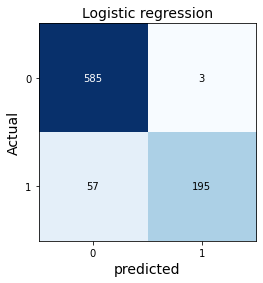

In [15]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(cm_log, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Logistic regression', fontsize=14)
plt.show()

In [16]:
#Convolutional Neural Network
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

In [17]:
 # Number of characteristics
input_dim = X_train.shape[1] 

k = Sequential()
k.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
k.add(layers.Dense(10,  activation='tanh'))
k.add(layers.Dense(1024, activation='relu'))

k.add(layers.BatchNormalization())
k.add(layers.Dropout(0.5))
k.add(layers.Dense(1, activation='sigmoid'))



In [18]:
k.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
k.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                94360     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1024)              11264     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                        

In [19]:
classifier_nn = k.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

Epoch 1/10
224/224 [==============================] - 3s 6ms/step - loss: 0.2102 - accuracy: 0.9110 - val_loss: 0.6752 - val_accuracy: 0.7000
Epoch 2/10
224/224 [==============================] - 1s 3ms/step - loss: 0.1010 - accuracy: 0.9625 - val_loss: 0.2518 - val_accuracy: 0.8833
Epoch 3/10
224/224 [==============================] - 2s 10ms/step - loss: 0.0994 - accuracy: 0.9646 - val_loss: 0.1176 - val_accuracy: 0.9262
Epoch 4/10
224/224 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9679 - val_loss: 0.0748 - val_accuracy: 0.9726
Epoch 5/10
224/224 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9652 - val_loss: 0.0690 - val_accuracy: 0.9750
Epoch 6/10
224/224 [==============================] - 2s 10ms/step - loss: 0.0793 - accuracy: 0.9723 - val_loss: 0.1020 - val_accuracy: 0.9679
Epoch 7/10
224/224 [==============================] - 2s 7ms/step - loss: 0.0784 - accuracy: 0.9696 - val_loss: 0.0994 - val_accuracy: 0.9667
Epoc

In [20]:
nn_pred=k.predict(X_test)

In [21]:
for i in range(len(nn_pred)):
    if nn_pred[i]>0.5:
        nn_pred[i]=1
    elif nn_pred[i]<=0.5:
        nn_pred[i]=0



In [22]:
accuracy_score(y_test,nn_pred)

0.975

In [23]:
def accuracy_percent(true_positives,true_negatives,false_positives,false_negatives):
    
    accuracy = (true_positives+true_negatives) / (true_positives+true_negatives+false_positives+false_negatives)
    
    return accuracy

In [24]:
def precision_percent(true_positives,false_positives):
    
    precision = true_positives / (true_positives+false_positives)
    
    return precision

In [25]:
def recall_percent(true_positives,false_negatives):
    
    recall=true_positives / (true_positives+false_negatives)
    
    return recall

In [26]:
def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive =true_positive+1
            elif pred != true:
                false_negative =false_negative+1

        elif true == 0:
            if pred == true:
                true_negative =true_negative+1
            elif pred != true:
                false_positive =false_positive+1
            
    accuracy=accuracy_percent(true_positive, true_negative, false_positive, false_negative)
    precision=precision_percent(true_positive, false_positive)
    recall=recall_percent(true_positive, false_negative)
    
    return (accuracy,
            precision,
           recall)

In [27]:
accuracy,precision,recall=confusion_matrix(y_test,nn_pred)

In [28]:
print("Accuracy percent : {0} \n Precision percent : {1} \n Recall percent : {2}".format(accuracy, precision, recall))

Accuracy percent : 0.975 
 Precision percent : 0.9261992619926199 
 Recall percent : 0.996031746031746


In [29]:
from sklearn.metrics import precision_score
precision_score(y_test, nn_pred)

0.9261992619926199

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, nn_pred)

0.996031746031746

In [31]:
#Confusion matrix for CNN  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
cm_nn= confusion_matrix(y_test, nn_pred)


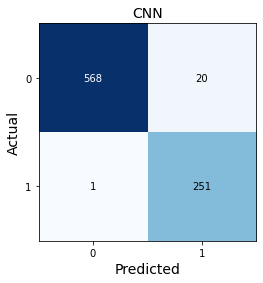

In [32]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(cm_nn, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('CNN', fontsize=14)
plt.show()

In [33]:
# Random forest
from sklearn.ensemble import RandomForestClassifier  
from dmba import classificationSummary
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)
y_rand_pred= classifier.predict(X_test)
y_pred
classificationSummary(y_test, y_rand_pred)

Confusion Matrix (Accuracy 0.9024)

       Prediction
Actual   0   1
     0 508  80
     1   2 250


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy percent: ', accuracy_score(y_test, y_rand_pred))
print('Precision percent:', precision_score(y_test, y_rand_pred))
print('Recall percent:   ', recall_score(y_test, y_rand_pred))

Accuracy percent:  0.9023809523809524
Precision percent: 0.7575757575757576
Recall percent:    0.9920634920634921


In [35]:
# Confusion matrix for random forest
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
cm_reg= confusion_matrix(y_test, y_rand_pred)
cm_reg

array([[508,  80],
       [  2, 250]], dtype=int64)

In [36]:
accuracy_score(y_test, y_rand_pred)


0.9023809523809524

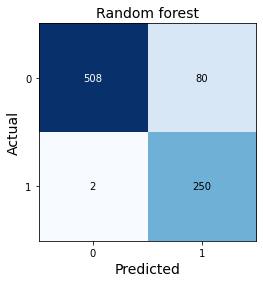

In [37]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(cm_reg, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Random forest', fontsize=14)
plt.show()

In [38]:
# Support vector classifier
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)
y_svm_pred= classifier.predict(X_test)


In [39]:
accuracy_score(y_test, y_svm_pred)
from sklearn.metrics import precision_score, recall_score, accuracy_score
print('Accuracy percent: ', accuracy_score(y_test, y_svm_pred))
print('Precision percent:', precision_score(y_test, y_svm_pred))
print('Recall percent:   ', recall_score(y_test, y_svm_pred))

Accuracy percent:  0.9380952380952381
Precision percent: 0.8289473684210527
Recall percent:    1.0


In [40]:
#Confusion matrix  for SVM
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
cm_svm= confusion_matrix(y_test, y_svm_pred)
cm_reg

array([[508,  80],
       [  2, 250]], dtype=int64)

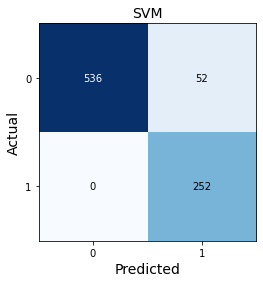

In [41]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(cm_svm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('SVM', fontsize=14)
plt.show()

In [42]:
# ADABoost 
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ada_pred=ad.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,ada_pred)

from sklearn.metrics import precision_score, recall_score, accuracy_score
print('Accuracy percent: ', accuracy_score(y_test, ada_pred))
print('Precision percent:', precision_score(y_test, ada_pred))
print('Recall percent:   ', recall_score(y_test, ada_pred))

Accuracy percent:  0.8976190476190476
Precision percent: 0.9825581395348837
Recall percent:    0.6706349206349206


In [43]:
#Confusion matrix for ADA
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
ada_cm= confusion_matrix(y_test, ada_pred)


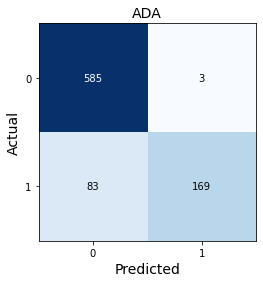

In [44]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(ada_cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('ADA', fontsize=14)
plt.show()

In [45]:
#K-NN classifier  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 
#Predicting the test set result  
knn_pred= classifier.predict(X_test)
accuracy_score(y_test,knn_pred)

from sklearn.metrics import precision_score, recall_score, accuracy_score
print('Accuracy percent: ', accuracy_score(y_test, knn_pred))
print('Precision percent:', precision_score(y_test, knn_pred))
print('Recall percent:   ', recall_score(y_test, knn_pred))

Accuracy percent:  0.47023809523809523
Precision percent: 0.335042735042735
Recall percent:    0.7777777777777778


In [46]:
#Confusion matrix for KNN   
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
knn_cm= confusion_matrix(y_test, knn_pred)


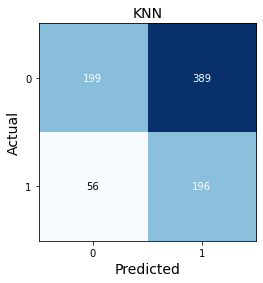

In [47]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(knn_cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('KNN', fontsize=14)
plt.show()

In [48]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)
#predict results  
NB_pred = classifier.predict(X_test)
accuracy_score(y_test,NB_pred)

from sklearn.metrics import precision_score, recall_score, accuracy_score
print('Accuracy percent: ', accuracy_score(y_test, NB_pred))
print('Precision percent:', precision_score(y_test, NB_pred))
print('Recall percent:   ', recall_score(y_test, NB_pred))

Accuracy percent:  0.9773809523809524
Precision percent: 0.9298892988929889
Recall percent:    1.0


In [49]:
#Confusion matrix for Naive Bayes
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
NB_cm= confusion_matrix(y_test, NB_pred)


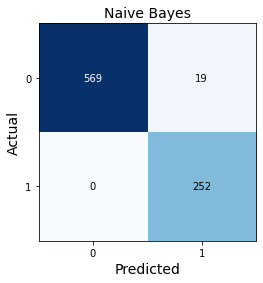

In [50]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(NB_cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Naive Bayes', fontsize=14)
plt.show()

In [51]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)
#Predict descision result 
decsn_pred= classifier.predict(X_test)
accuracy_score(y_test,decsn_pred)

print('Accuracy percent: ', accuracy_score(y_test, decsn_pred))
print('Precision percent:', precision_score(y_test, decsn_pred))
print('Recall percent:   ', recall_score(y_test, decsn_pred))


Accuracy percent:  0.8821428571428571
Precision percent: 0.717948717948718
Recall percent:    1.0


In [52]:
# Decision tree
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
dcsn_cm= confusion_matrix(y_test, decsn_pred)

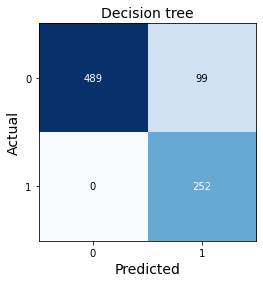

In [53]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(dcsn_cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Decision tree', fontsize=14)
plt.show()

In [54]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

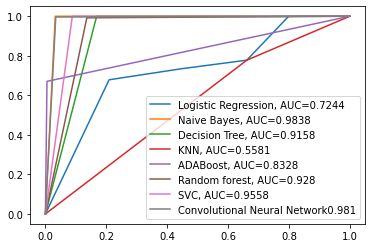

In [56]:
# configure plot area
plt.figure(0).clf()

#plot logistic regression model in ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_r_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#plot Naive Bayes model in  ROC curve
model = GaussianNB()  
model.fit(X_train, y_train)
y_r_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, NB_pred)
auc = round(metrics.roc_auc_score(y_test, NB_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

#plot Decision Tree model in ROC curve
model = DecisionTreeClassifier(criterion='entropy', random_state=0) 
model.fit(X_train, y_train)
y_r_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, decsn_pred)
auc = round(metrics.roc_auc_score(y_test, decsn_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))


#plot KNN model in ROC curve
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, knn_pred)
auc = round(metrics.roc_auc_score(y_test, knn_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#plot ADA Boost model in ROC curve
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model.fit(X_train, y_train)
y_r_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, ada_pred)
auc = round(metrics.roc_auc_score(y_test, ada_pred), 4)
plt.plot(fpr,tpr,label="ADABoost, AUC="+str(auc))


#plot Rndom forest model in ROC curve
model = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(X_train, y_train)
y_r_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_rand_pred)
auc = round(metrics.roc_auc_score(y_test, y_rand_pred), 4)
plt.plot(fpr,tpr,label="Random forest, AUC="+str(auc))

#plot SVC model in ROC curve
model = SVC(probability=True)
model.fit(X_train, y_train)
y_r_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_svm_pred)
auc = round(metrics.roc_auc_score(y_test, y_svm_pred), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))


#plot CNN model in ROC curve
model.fit(X_train, y_train)

y_r_pred = model.predict_proba(X_test)[:, 1]

fpr, tpr, _  = metrics.roc_curve(y_test, nn_pred)
auc = round(metrics.roc_auc_score(y_test, nn_pred), 4)
plt.plot(fpr,tpr,label="Convolutional Neural Network"+str(auc))



#plot legend
plt.legend()